Yeni Sütun İsimleri: Index(['date', 'Iron_Feed', 'Silica_Feed', 'Starch_Flow', 'Amina_Flow',
       'Ore_Pulp_Flow', 'Ore_Pulp_pH', 'Ore_Pulp_Density',
       'Flotation_Column_01_Air_Flow', 'Flotation_Column_02_Air_Flow',
       'Flotation_Column_03_Air_Flow', 'Flotation_Column_04_Air_Flow',
       'Flotation_Column_05_Air_Flow', 'Flotation_Column_06_Air_Flow',
       'Flotation_Column_07_Air_Flow', 'Flotation_Column_01_Level',
       'Flotation_Column_02_Level', 'Flotation_Column_03_Level',
       'Flotation_Column_04_Level', 'Flotation_Column_05_Level',
       'Flotation_Column_06_Level', 'Flotation_Column_07_Level',
       'Iron_Concentrate', 'Silica_Concentrate'],
      dtype='object')
Eğitim Seti Boyutu: (589962, 22)
Test Seti Boyutu: (147491, 22)
Model eğitiliyor... (Bu işlem 1-2 dakika sürebilir)
Eğitim tamamlandı.
--- Baseline Model Sonuçları ---
RMSE (Hata Payı): 0.3806
R2 Score (Başarı Oranı): 0.8854


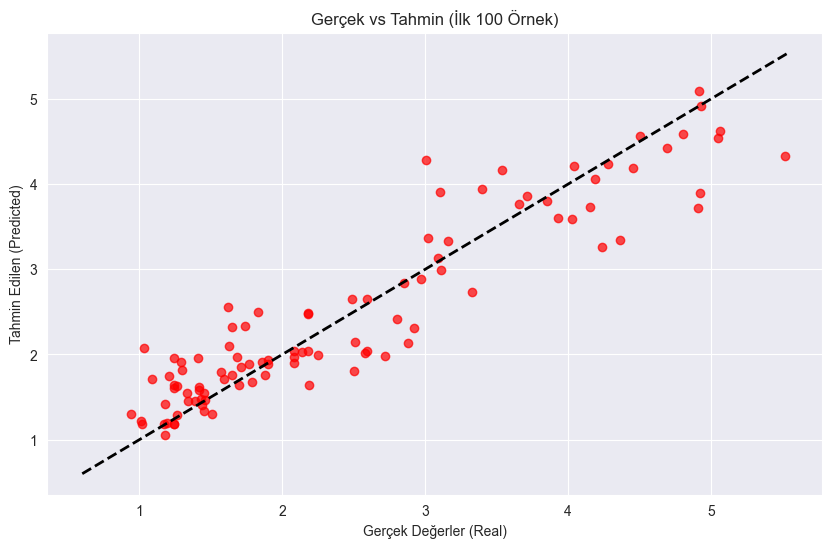

In [1]:
# Hücre 1: Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Hücre 2: Veriyi Tekrar Yükle (Senin çalışan path'inle)
# Not: Windows path hatasını çözdüğümüz haliyle kullan
df = pd.read_csv(r'C:\Users\Sedat\PycharmProjects\mining-quality-prediction\data\MiningProcess_Flotation_Plant_Database.csv', decimal=',', parse_dates=['date'], dayfirst=True)

# Sütun isimlerindeki boşlukları ve % işaretlerini temizleyelim (Kod yazarken kolaylık olsun)
# Örnek: '% Silica Concentrate' -> 'Silica_Concentrate' olur
df.columns = [col.replace(' ', '_').replace('%_', '').replace('(', '').replace(')', '') for col in df.columns]
print("Yeni Sütun İsimleri:", df.columns)

# Hücre 3: Veriyi Hazırla (X ve y)
# Tarih sütunu modelde kullanılamaz, atıyoruz.
# Hedefimiz (y): Silica_Concentrate (Ürün içindeki safsızlık oranı)
X = df.drop(['date', 'Silica_Concentrate'], axis=1)
y = df['Silica_Concentrate']

# Eğitim ve Test seti olarak ayır (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

# Hücre 4: Modeli Kur ve Eğit (Baseline)
# n_jobs=-1 bilgisayarın tüm işlemci çekirdeklerini kullanır (Hızlandırır)
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

print("Model eğitiliyor... (Bu işlem 1-2 dakika sürebilir)")
rf_model.fit(X_train, y_train)
print("Eğitim tamamlandı.")

# Hücre 5: Tahmin ve Değerlendirme
y_pred = rf_model.predict(X_test)

# Metrikler
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Baseline Model Sonuçları ---")
print(f"RMSE (Hata Payı): {rmse:.4f}")
print(f"R2 Score (Başarı Oranı): {r2:.4f}")

# Başarıyı Görselleştir (Gerçek vs Tahmin)
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.7, color='red') # Sadece ilk 100 örneği çizelim ki grafik karışmasın
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # İdeal çizgi
plt.xlabel('Gerçek Değerler (Real)')
plt.ylabel('Tahmin Edilen (Predicted)')
plt.title('Gerçek vs Tahmin (İlk 100 Örnek)')
plt.show()